In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from tqdm.notebook import tqdm

ayu_colors = {
    'axes.facecolor': '#1F2430',      # фон графика
    'figure.facecolor': '#1F2430',    # фон фигуры
    'text.color': '#CBCCC6',          # цвет текста
    'axes.labelcolor': '#CBCCC6',     # цвет подписей осей
    'xtick.color': '#707A8C',         # цвет делений оси X
    'ytick.color': '#707A8C',         # цвет делений оси Y
    'grid.color': '#232834',          # цвет сетки
    'axes.prop_cycle': plt.cycler(color=['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2'])  # цвета линий как в dark_background
}

plt.rcParams.update(ayu_colors)


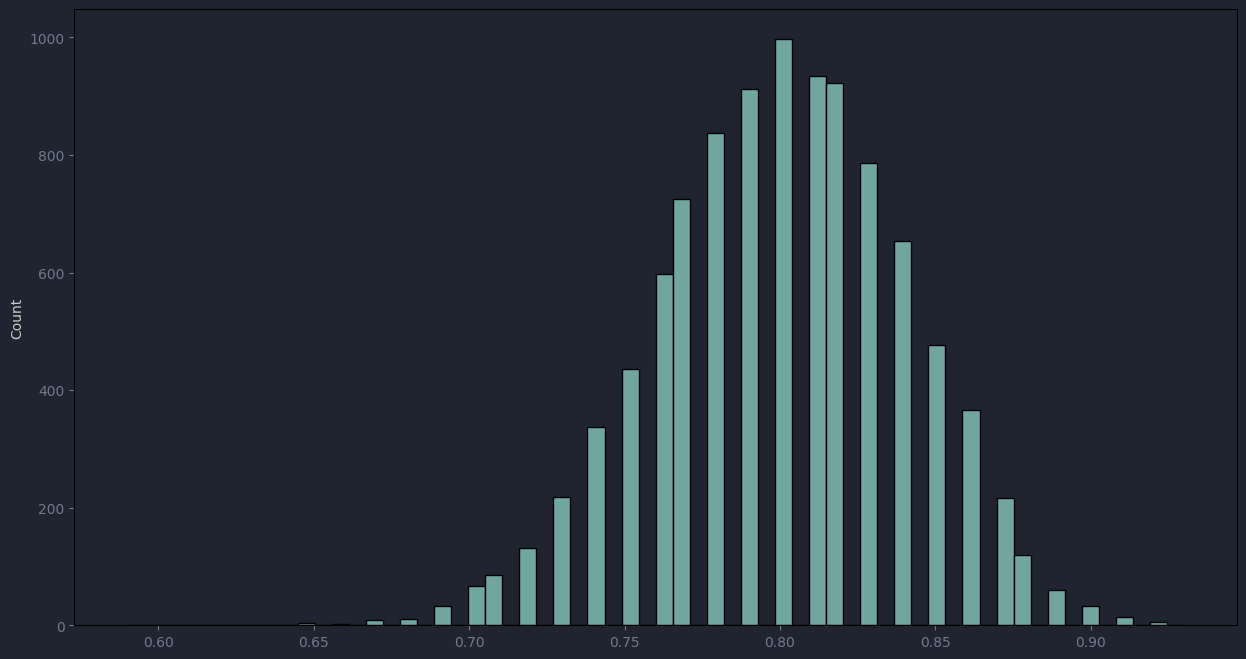

In [2]:
plt.figure(figsize=(15, 8))

sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)])
plt.show()

Конверсия на текущем лендинге составляет 10%. Покажем новый лендинг только 30% клиентов.

In [3]:
df = pd.DataFrame({'group':['old landing (A)', 'new landing (B)'],
                   'lead':[700, 300],
                   'sale':[70, 48]})

In [4]:
df['cr'] = df['sale'] / df['lead']

In [5]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


Допустим, что никакой разницы нет, какова вероятность получить такие же и большие различия при том, что никакой разницы нет?

In [6]:
(70 + 48) / 1000

0.118

In [7]:
np.random.binomial(1, 0.118, size=700).mean()

np.float64(0.11428571428571428)

In [8]:
np.random.binomial(1, 0.118, size=300).mean()

np.float64(0.11666666666666667)

In [9]:
np.mean([abs(np.random.binomial(1, 0.118, size=300).mean() - np.random.binomial(1, 0.118, size=700).mean()) >= 0.06
for _ in range(10000)])

np.float64(0.0069)

In [10]:
z_test, p_val = proportions_ztest([70, 48], [700, 300])

In [11]:
float(p_val)

0.007035346384355496

In [12]:
df = pd.DataFrame(np.random.normal(size=1000))

array([[<Axes: title={'center': '0'}>]], dtype=object)

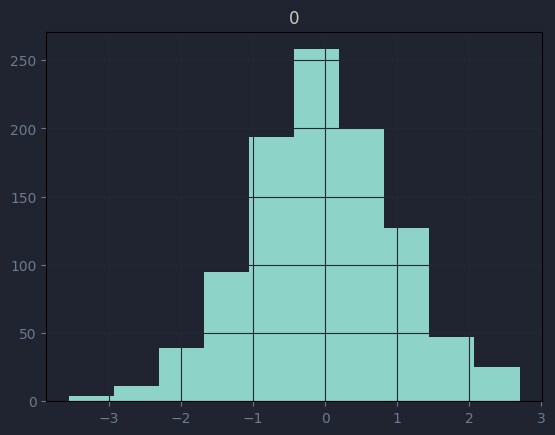

In [13]:
df.hist()

In [14]:
df = df.sort_values(0)

In [15]:
df['cnt'] = range(1, 1001)

In [16]:
df['pct'] = df['cnt'] / 1000

<Axes: xlabel='pct', ylabel='Count'>

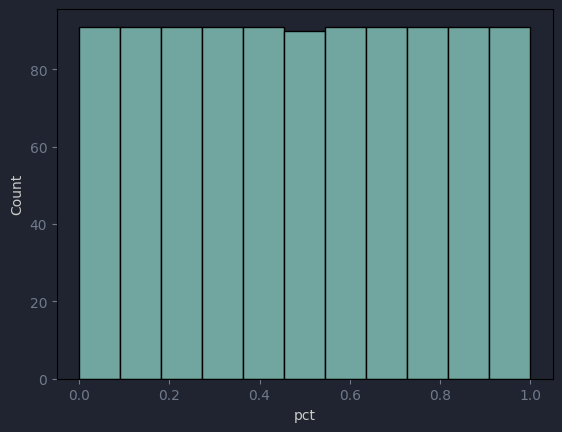

In [17]:
sns.histplot(df['pct'])

In [18]:
n = 1000
result = []

for _ in tqdm(range(n)):
    a = np.random.binomial(1, 0.1, size=700).mean()
    b = np.random.binomial(1, 0.12, size=300).mean()
    diff = abs(a - b)

    pval = np.mean([abs(np.random.binomial(1, 0.118, size=300).mean() - np.random.binomial(1, 0.118, size=700).mean()) >= diff for _ in range(n)])
    result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

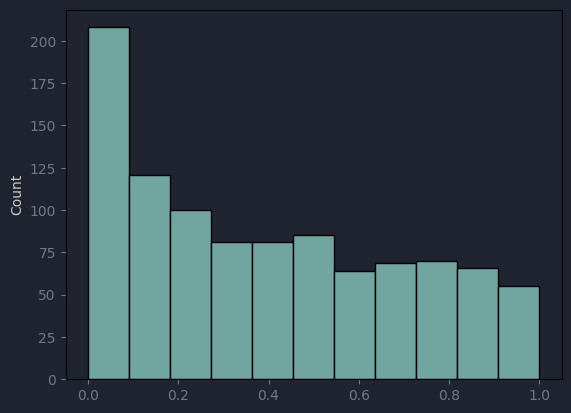

In [19]:
sns.histplot(result)

Мощность теста равна:

In [20]:
(pd.Series(result) < 0.05).mean()

np.float64(0.143)

In [21]:
n = 1000
result = []

for _ in tqdm(range(n)):
    a = np.random.binomial(1, 0.1, size=700).mean()
    b = np.random.binomial(1, 0.15, size=300).mean()
    diff = abs(a - b)

    pval = np.mean([abs(np.random.binomial(1, 0.118, size=300).mean() - np.random.binomial(1, 0.118, size=700).mean()) >= diff for _ in range(n)])
    result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [22]:
(pd.Series(result) < 0.05).mean()

np.float64(0.615)

In [23]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.584, alpha=0.05, ratio=3/7)

681.5816650531352

In [24]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.8, alpha=0.05, ratio=3/7)

1133.9211012097023

In [25]:
1133 * 3 / 7 

485.57142857142856

In [ ]:
n = 1000
result = []

for _ in tqdm(range(n)):
    a = np.random.binomial(1, 0.1, size=1133)
    b = np.random.binomial(1, 0.15, size=485)

    _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)])
    result.append(pval)

In [ ]:
(pd.Series(result) < 0.05).mean()

np.float64(0.797)